<a href="https://colab.research.google.com/github/angiegh2002/language_app/blob/main/arabic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!pip install arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 7.4 MB/s eta 0:00:00


In [2]:
!curl -X GET  "https://huggingface.co/api/datasets/riotu-lab/arabic_reverse_dictionary/parquet/default/train"

["https://huggingface.co/api/datasets/riotu-lab/arabic_reverse_dictionary/parquet/default/train/0.parquet"]

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_parquet("/content/drive/MyDrive/Dataset data/data.parquet")


In [5]:
dataset.head()

,word,definition
0,تمنيع ذاتي,تحريض لاستجابة مناعية لبعض مكونات العضوية [الك...
1,مَسارٌ هاملتوني,مسار يمر عبر كل رأس في رسم بياني دون تكرار أي ...
2,الكلمة,أصغر وحدة لغوية تحمل معنى مستقل ويمكن استخدامه...
3,طرف,الجانبي جمع (طرفَة) وهو الغريبة من التمر [لغة]
4,الاسم,كلمة تدل على شيء أو شخص أو مكان وتستخدم عادة ف...


In [6]:
dataset.shape

(58607, 2)

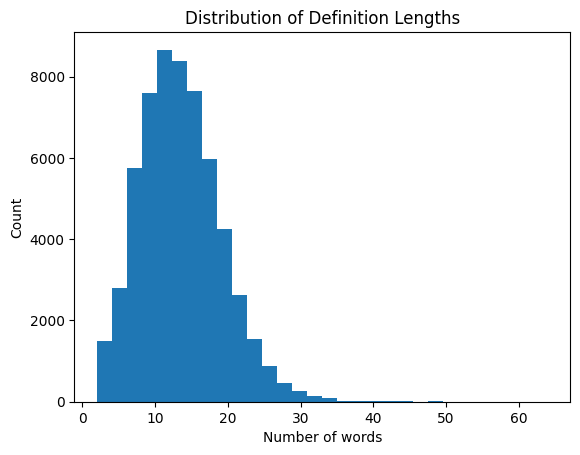

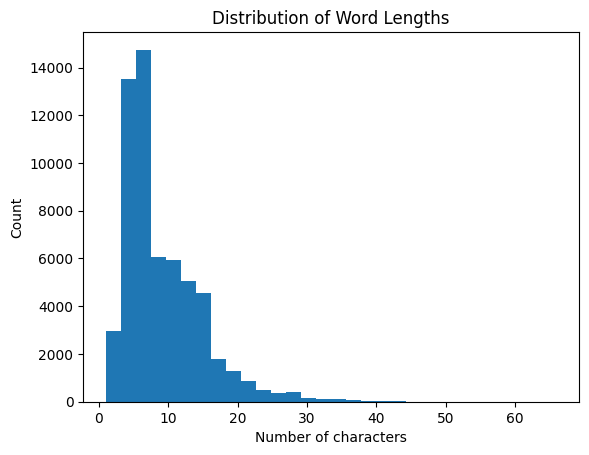

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
def_lengths = [len(str(row['definition']).split()) for index, row in dataset.iterrows() if row['definition'] is not None]
word_lengths = [len(str(row['word'])) for index, row in dataset.iterrows() if row['word'] is not None]

plt.hist(def_lengths, bins=30)
plt.title("Distribution of Definition Lengths")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()

plt.hist(word_lengths, bins=30)
plt.title("Distribution of Word Lengths")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()

In [8]:
definitions = [row['definition'] for index, row in dataset.iterrows()]
words = [row['word'] for index, row in dataset.iterrows()]

print(f"Missing definitions: {sum([d is None for d in definitions])}")
print(f"Missing words: {sum([w is None for w in words])}")

print(f"Unique words: {len(set(words))}")

Missing definitions: 0
Missing words: 2
Unique words: 35617


In [9]:
dataset_clean = dataset.dropna(subset=['word'])
print(f"بعد التنظيف: {len(dataset_clean)} صف")


بعد التنظيف: 58605 صف


In [10]:
dataset_clean.duplicated().sum()

np.int64(61)

In [11]:
dataset_clean = dataset_clean.drop_duplicates()
print(f"بعد التنظيف: {len(dataset_clean)} صف")

بعد التنظيف: 58544 صف


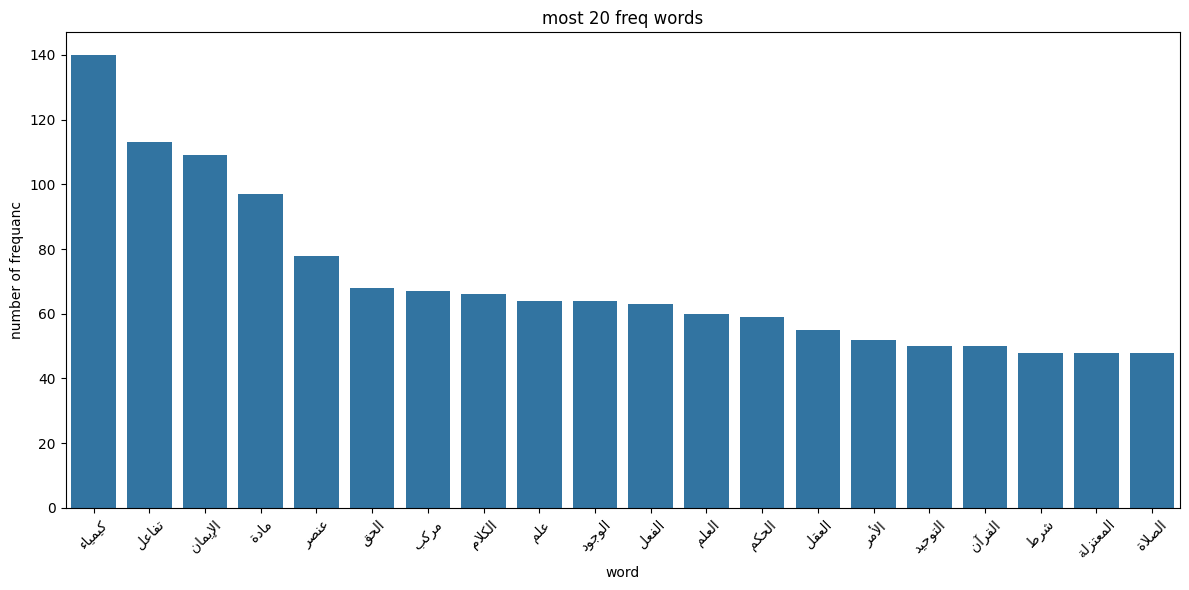

In [17]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

word_counter = Counter(dataset_clean["word"])
common_words = word_counter.most_common(20)

reshaped_words = [arabic_reshaper.reshape(word) for word, _ in common_words]
bidi_words = [get_display(w) for w in reshaped_words]
counts = [count for _, count in common_words]

plt.figure(figsize=(12, 6))
sns.barplot(x=bidi_words, y=counts)
plt.xticks(rotation=45)
plt.title("most 20 freq words")
plt.xlabel("word")
plt.ylabel("number of frequanc")
plt.tight_layout()
plt.show()


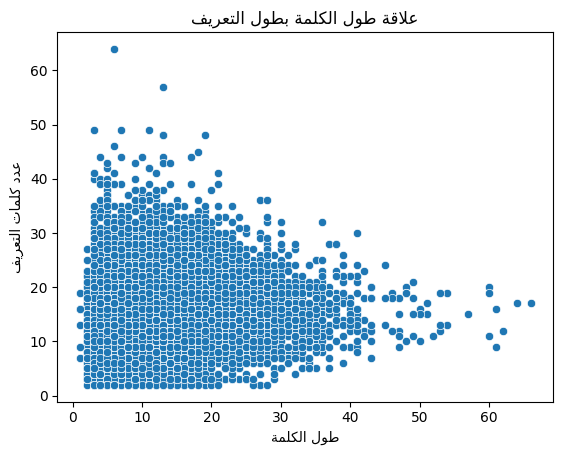

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

dataset_clean["word_length"] = dataset_clean["word"].apply(len)
dataset_clean["def_length"] = dataset_clean["definition"].apply(lambda x: len(str(x).split()))

sns.scatterplot(data=dataset_clean, x="word_length", y="def_length")

title_reshaped = arabic_reshaper.reshape("علاقة طول الكلمة بطول التعريف")
title_bidi = get_display(title_reshaped)
plt.title(title_bidi)

xlabel_reshaped = arabic_reshaper.reshape("طول الكلمة")
xlabel_bidi = get_display(xlabel_reshaped)
plt.xlabel(xlabel_bidi)

ylabel_reshaped = arabic_reshaper.reshape("عدد كلمات التعريف")
ylabel_bidi = get_display(ylabel_reshaped)
plt.ylabel(ylabel_bidi)

plt.show()

In [20]:
rare_words = word_counter.most_common()[-20:]
print("كلمات نادرة في البيانات:", [w for w, _ in rare_words])


كلمات نادرة في البيانات: ['طيف إصدار', 'بيان موجه ضعيف الترابط', 'ذراع', 'مصفوفة مهيمنة قطرية', 'قاعدة عضوية', 'قاعدة الميزان', 'منظار الحنجرة', 'عدد ماخ', 'الحشاشون', 'تکلید مشع', 'جزيئات', 'مُؤَشِّرُ الأسعار', 'يُعجب', 'تقسيم منتشر', 'الـشراء', 'الأخيف', 'السَّعْي إِذا كَانَ', 'الحاجات', 'مُبَرّد بيني', 'مُبَرْهَنةُ التَّمْدِيدِ لِتِيتُس']


In [21]:
dataset_clean["starts_with"] = dataset_clean["definition"].apply(lambda x: str(x).strip().split(" ")[0])
starts_freq = Counter(dataset_clean["starts_with"])
print("أكثر الكلمات بداية للتعريف:", starts_freq.most_common(10))


أكثر الكلمات بداية للتعريف: [('هو', 2703), ('مصطلح', 2159), ('عملية', 1995), ('هي', 1781), ('ما', 1207), ('مجموعة', 1135), ('اسم', 875), ('نوع', 845), ('حالة', 741), ('في', 712)]


In [22]:
unique_defs = set(dataset_clean["definition"])
print(f"نسبة التعاريف الفريدة: {len(unique_defs) / len(dataset_clean):.2%}")


نسبة التعاريف الفريدة: 99.91%


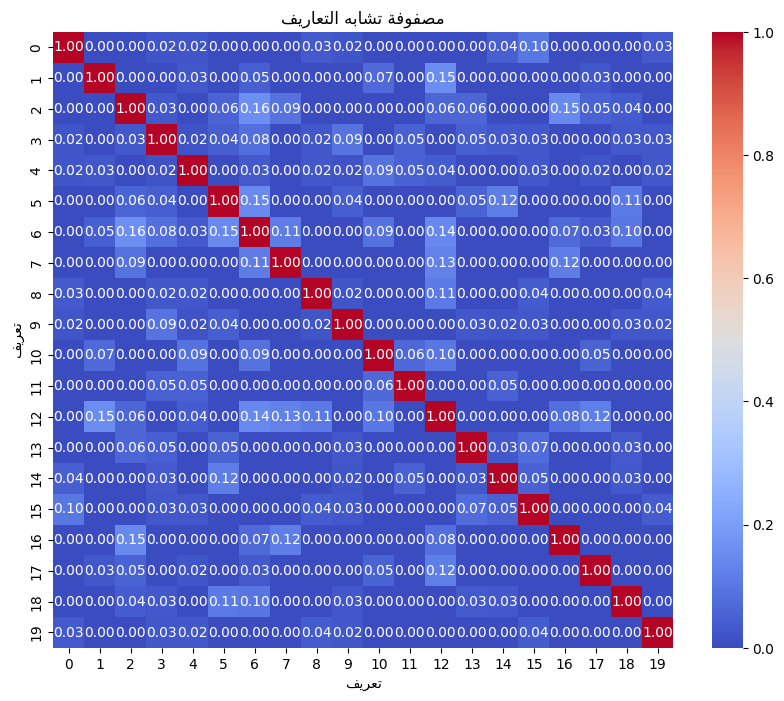

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sample_defs = dataset_clean["definition"].dropna().sample(20, random_state=42).astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample_defs)

similarity_matrix = cosine_similarity(X)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f")

title_ar = "مصفوفة تشابه التعاريف"
reshaped_title = arabic_reshaper.reshape(title_ar)
bidi_title = get_display(reshaped_title)
plt.title(bidi_title)

label_reshaped = arabic_reshaper.reshape("تعريف")
label_bidi = get_display(label_reshaped)

plt.xlabel(label_bidi)
plt.ylabel(label_bidi)
plt.show()


In [38]:
import re

def remove_diacritics(text):
    arabic_diacritics = re.compile("""
         ّ    | # Shadda
         َ    | # Fatha
         ً    | # Tanwin Fath
         ُ    | # Damma
         ٌ    | # Tanwin Damm
         ِ    | # Kasra
         ٍ    | # Tanwin Kasr
         ْ    | # Sukun
         ـ     # Tatwil/Kashida
     """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

def clean_definition(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""
    text = re.sub(r'\s*\[[^\]]*\]\s*', ' ', text)
    text = re.sub(r'\b[a-zA-Z]+\b', ' ', text)
    text = re.sub(r'\b\d+[a-zA-Z]*\d*\b', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\s+،\s*', '، ', text)
    text = re.sub(r'\s+\.+\s*', '. ', text)
    text = re.sub(r'^[\s\.,،]+|[\s\.,،]+$', '', text)

    text = remove_diacritics(text)

    return text.strip()


In [39]:
def preprocess(row):
    cleaned_definition = clean_definition(row['definition'])
    word_no_diacritics = remove_diacritics(row['word'])
    word_no_diacritics = remove_diacritics(row['word'])  # إزالة التشكيل من الكلمة أيضاً
    return pd.Series({
        "input_text": f" صف الكلمة التالية : {word_no_diacritics}",
        "target_text": cleaned_definition
    })

processed_df = dataset_clean.apply(preprocess, axis=1)

In [40]:
processed_df

,input_text,target_text
0,صف الكلمة التالية : تمنيع ذاتي,تحريض لاستجابة مناعية لبعض مكونات العضوية
1,صف الكلمة التالية : مسار هاملتوني,مسار يمر عبر كل رأس في رسم بياني دون تكرار أي رأس
2,صف الكلمة التالية : الكلمة,أصغر وحدة لغوية تحمل معنى مستقل ويمكن استخدامه...
3,صف الكلمة التالية : طرف,الجانبي جمع (طرفة) وهو الغريبة من التمر
4,صف الكلمة التالية : الاسم,كلمة تدل على شيء أو شخص أو مكان وتستخدم عادة ف...
...,...,...
58602,صف الكلمة التالية : الاستفهام,طلب معرفة شيء أو تأكيده
58603,صف الكلمة التالية : السعي إذا كان,التعبير عن المضي الجري والسعي نحو شيء ما
58604,صف الكلمة التالية : الحاجات,المتطلبات الأساسية أو الضرورية للإنسان
58605,صف الكلمة التالية : مبرد بيني,مبادل حراري لتبريد الهواء بين مراحل الضغط المت...


In [41]:
# from transformers import T5Tokenizer, T5ForConditionalGeneration

# model_name = "UBC-NLP/AraT5-base"
# tokenizer = T5Tokenizer.from_pretrained(model_name)
# model = T5ForConditionalGeneration.from_pretrained(model_name)

In [46]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

model_name = "flax-community/arabic-t5-small"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


config.json:   0%|          | 0.00/683 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [47]:
from datasets import Dataset

dataset = Dataset.from_pandas(processed_df)

dataset_split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = dataset_split['train']
val_dataset = dataset_split['test']

In [48]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, DataCollatorForSeq2Seq

# tokenizer = T5Tokenizer.from_pretrained("UBC-NLP/AraT5-base")

def preprocess_function(examples):
    inputs = [inp for inp in examples["input_text"]]
    targets = [tgt for tgt in examples["target_text"]]

    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length", return_tensors=None)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length", return_tensors=None)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_val = val_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/46835 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3950: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/11709 [00:00<?, ? examples/s]

In [17]:
# pip install -U transformers


In [49]:
# from transformers import Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq

# training_args = TrainingArguments(
#     output_dir="./arabict5-description-model",
#     do_train=True,
#     do_eval=True,
#     learning_rate=3e-5,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     gradient_accumulation_steps=16,
#     num_train_epochs=3,
#     weight_decay=0.01,
#     logging_dir="./logs",
#     logging_steps=100,
#     save_steps=1000,
#     eval_steps=1000,
#     save_total_limit=2,
#     fp16= True,
#     report_to="none",
#     run_name="arabict5-run"
# )
# data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)
# optimizer = Adafactor(
#     model.parameters(),
#     scale_parameter=True,
#     relative_step=False,
#     warmup_init=False,
#     lr=3e-5
# )


# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_train,
#     eval_dataset=tokenized_val,
#     tokenizer=tokenizer,
#     data_collator=data_collator,
#     optimizers=(optimizer, None)
# )

/tmp/ipython-input-1190706409.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [57]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=False,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=False,
    warmup_init=False,
    lr=3e-5
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    optimizers=(optimizer, None),
    compute_metrics=compute_metrics
)

/tmp/ipython-input-3463986751.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [58]:
trainer.train()
trainer.save_model("arabict5-final")

KeyboardInterrupt: 

In [60]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
import numpy as np

small_train = tokenized_train.shuffle(seed=42).select(range(200))
small_val = tokenized_val.shuffle(seed=42).select(range(50))

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    bleu_score = bleu.compute(predictions=[p.split() for p in decoded_preds],
                              references=[[r.split()] for r in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-mini-run",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    logging_steps=10,
    save_steps=50,
    eval_steps=50,
    save_total_limit=1,
    report_to="none"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=False,
    warmup_init=False,
    lr=3e-5
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train,
    eval_dataset=small_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    optimizers=(optimizer, None),
    compute_metrics=compute_metrics
)

trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-mini-final")


/tmp/ipython-input-1515236891.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,22.958900
20,21.273400
30,20.156700
40,19.263600
50,19.234800


In [1]:
from transformers import T5ForConditionalGeneration, AutoTokenizer

# تحميل النموذج المدرب
model_path = "/content/drive/MyDrive/arabict5-mini-final"
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# الكلمة التي تريد توليد وصف لها
input_word = "قمر"  # غيّر الكلمة هنا

# تحضير الإدخال للنموذج
input_text = f"وصف: {input_word}"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# توليد التنبؤ
output = model.generate(input_ids, max_length=64, num_beams=4, early_stopping=True)
generated_desc = tokenizer.decode(output[0], skip_special_tokens=True)

print(f"الوصف المولّد لكلمة '{input_word}': {generated_desc}")


الوصف المولّد لكلمة 'قمر': : قمر: قمر قمر: قمر قمر: قمر قمر: قمر: قمر قمر: قمر: قمر قمر قمر قمر: قمر: قمر: قمر قمر - قمر: قمر: قمر: قمر: قمر: قمر


In [ ]:
results = trainer.evaluate()
print(results)


In [6]:
input_word = "موجب"
input_text = f"صف الكلمة التالية : {input_word}"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

output = model.generate(
    input_ids,
    max_length=64,
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=3,
    early_stopping=True
)


generated_desc = tokenizer.decode(output[0], skip_special_tokens=True)
print(f"الوصف المولّد لكلمة '{input_word}': {generated_desc}")


الوصف المولّد لكلمة 'موجب': : : : : موجب : : : : سالبة   : سال : : : : : : :  : 


In [ ]:
!pip install datasets

In [54]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.6 MB/s eta 0:00:00


In [56]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=62a40ac00eecefd6ca6c635407eaa2185e1cfb1305e051752553b0216b9186c6
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
